In [1]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

In [2]:
with open('data/dataHoldout.txt', 'rb') as file:
    auxFile = file.read()


dataHoldout = np.frombuffer(auxFile)
dataHoldout.resize((int(len(dataHoldout)/3)), 3)
X = dataHoldout[...,0:2] #[[x01,x02], ...]
y = dataHoldout[...,2] #[[yd0], [yd1], ...]
# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

#instanciando o neuronio, inserindo apenas a taxa de aprendizado
# e os intervalos superior e inferior dos pesos
config= [[0.1,-100,100], [0.1,-1,1], [0.01,-0.1,0.1]]
fitWeight = []
epoch = []
#print("Configuração: ", config)
n = Neuron(config[2][0], config[2][1], config[2][2])

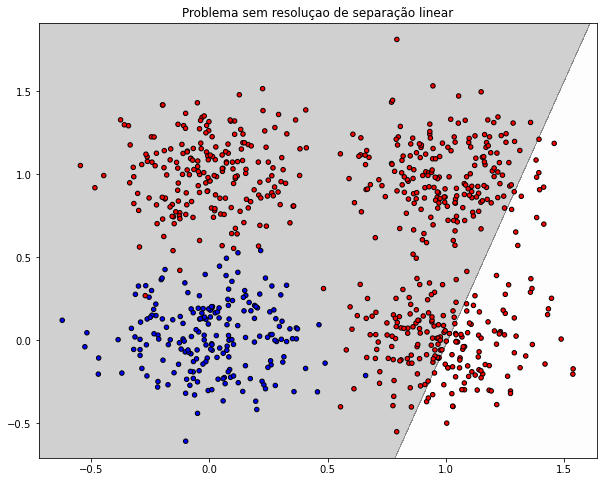

In [3]:
#Evidenciando que este problema não é de uma separação linear
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Problema sem resoluçao de separação linear']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)
plt.show()

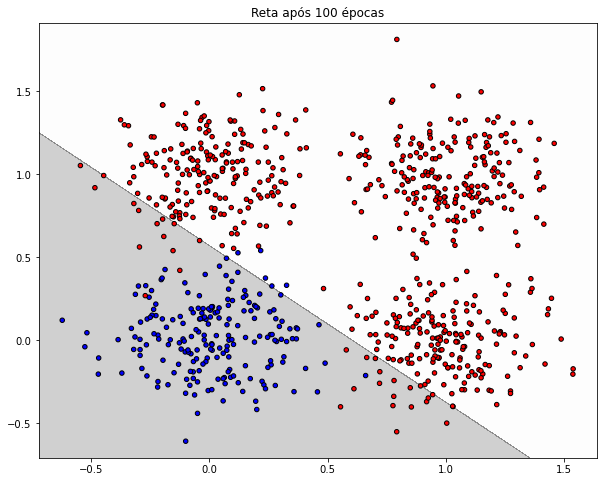

In [4]:
np.random.seed(0)
msk = np.random.rand(len(dataHoldout)) < 0.7
train = dataHoldout[msk]
test = dataHoldout[~msk]

XTrain = train[...,0:2]
XTrain = np.insert(XTrain, 2, 1, axis=1)
XTest = test[...,0:2]

yTrain = train[...,2]
yTest = test[...,2]

n.run100epochs(XTrain, yTrain)

#Traçando reta após 100 épocas
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Reta após 100 épocas']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)
plt.show()

    1    0
1  52   10
0   2  157


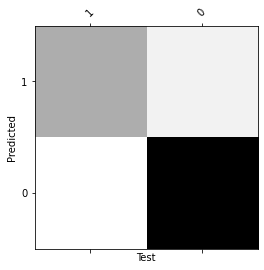

In [5]:
yPredicted = n.predict(XTest)
# Calculando matriz de confusão
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(yPredicted)):
    if(yPredicted[i] == yTest[i]):
        if(yPredicted[i] == 1):
            tp = tp+1
        if(yPredicted[i] == 0):
            tn = tn+1
    if(yPredicted[i] != yTest[i]):
        if(yPredicted[i] == 0):
            fn = fn+1
        if(yPredicted[i] == 1):
            fp = fp+1
confusion_matrix = pd.DataFrame([[tp,fp], [fn, tn]], 
                             columns=['1', '0'], index=['1', '0'])
print(confusion_matrix)
# Plotando matriz de confusão
cmap=plt.cm.gray_r
plt.matshow(confusion_matrix, cmap=cmap) # imshow
tick_marks = np.arange(len(confusion_matrix.columns))
plt.xticks(tick_marks, confusion_matrix.columns, rotation=45)
plt.yticks(tick_marks, confusion_matrix.index)
plt.ylabel('Predicted')
plt.xlabel('Test')

# Revertendo para matriz
confusion_matrix = confusion_matrix.to_numpy()


In [9]:
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + fn + tn + fp)
recall = tp / (tp + fn)
fscore = (2 * precision * recall) / (precision + recall)


print(f'A acurácia é a métrica que apresenta a quantidade de vezes em que o modelo fez uma predição da forma correta, seja ela positiva ou negativa. Com um valor de {accuracy:.4}, podemos entender que uma previsão correta acontece em, aproximadamente, 94,,,% dos casos no conjunto de teste, o que é um valor considerado bom. Apesar de ser um bom indicativo, não é a única métrica relevante para a análise de um modelo, especialmente considerando se tratar de um dataset desbalanceado, com quantidade de saídas y = 0 muito superiores à saídas com y = 1, um clássico problema em que a acurácia não é uma boa métrica para análise.')
yDf = pd.DataFrame({'y': y})['y'].value_counts()
print('\nQuantidade de dados de y para valores 0 e 1:')
print(yDf)
print(f'\n A precisão determina o quanto os casos determinados como positivos pelo modelo eram realmente positivos. Com a precisão de {precision:.4}, conseguimos perceber cerca de 18% dos casos considerados positivos é previsto de forma errônea, o que para contextos em que a classificação positiva é crítica, como diagnóstico de doenças, onde um falso positivo pode ser fatal.')
print(f'\n O recall determina o quanto casos que eram positivos foram previstos como positivos pelo modelo. Com o recall de {recall:.4}, conseguimos perceber que em aproximadamente 98% dos casos que eram positivos, o modelo consegue acertar a previsão, um valor bom para o modelo se tratando da previsão de casos positivos, tendo menos impacto em situações onde um caso falso negativo não implica em decisões críticas.')
print(f'\n O F1Score é a média harmônica entre a precisão e recall. Usamos a média harmônica pois a média aritmética é altamente influenciada por valores discrepantes. Quanto maior o valor do F1Score, mais balanceado e melhor é o modelo. O valor de F1Score é {fscore:.4}, o que indica que o modelo tem bom desempenho para predição com os dados do conjunto de testes.')

A acurácia é a métrica que apresenta a quantidade de vezes em que o modelo fez uma predição da forma correta, seja ela positiva ou negativa. Com um valor de 0.9457, podemos entender que uma previsão correta acontece em, aproximadamente, 94,,,% dos casos no conjunto de teste, o que é um valor considerado bom. Apesar de ser um bom indicativo, não é a única métrica relevante para a análise de um modelo, especialmente considerando se tratar de um dataset desbalanceado, com quantidade de saídas y = 0 muito superiores à saídas com y = 1, um clássico problema em que a acurácia não é uma boa métrica para análise.

Quantidade de dados de y para valores 0 e 1:
0.0    600
1.0    200
Name: y, dtype: int64

 A precisão determina o quanto os casos determinados como positivos pelo modelo eram realmente positivos. Com a precisão de 0.8387, conseguimos perceber cerca de 18% dos casos considerados positivos é previsto de forma errônea, o que para contextos em que a classificação positiva é crítica, como

[]

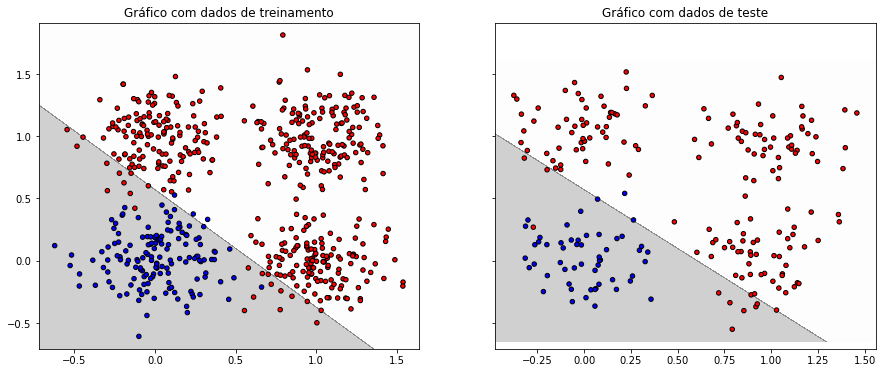

In [7]:
#Gráfico com dados de treinamento
x_min, x_max = XTrain[:, 0].min() - 0.1, XTrain[:, 0].max() + 0.1
y_min, y_max = XTrain[:, 1].min() - 0.1, XTrain[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, (axarr, axarr1) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 6))
color = np.where(yTrain == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Gráfico com dados de treinamento']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(XTrain[:, 0], XTrain[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)
axarr.plot()

# Gráfico com dados de teste
XTest = np.insert(XTest, 2, 1, axis=1)
x_minTest, x_maxTest = XTest[:, 0].min() - 0.1, XTest[:, 0].max() + 0.1
y_minTest, y_maxTest = XTest[:, 1].min() - 0.1, XTest[:, 1].max() + 0.1
xxTest, yyTest = np.meshgrid(np.arange(x_minTest, x_maxTest, 0.001),
                     np.arange(y_minTest, y_maxTest, 0.001))

color = np.where(yTest == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Gráfico com dados de teste']):

    ZTest = clf.predict(np.c_[xxTest.ravel(), yyTest.ravel()])
    ZTest = np.array(ZTest)
    ZTest = ZTest.reshape(xxTest.shape)

    axarr1.contourf(xxTest, yyTest, ZTest, alpha=0.2,cmap='Greys')
    axarr1.scatter(XTest[:, 0], XTest[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr1.set_title(tt)
axarr1.plot()

